In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.interpolate import interp1d
from scipy.special import expit
from fractions import Fraction
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.formula.api as smfa

In [2]:
from data.utils import update_binomial, make_dice, add_dist_seq, make_mixture

In [3]:
hypos = np.linspace(0, 1, 101)
pmf = Pmf(1, hypos)
data = 140, 250

<AxesSubplot:>

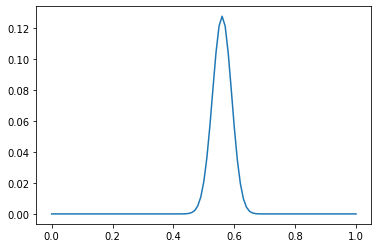

In [4]:
posterior = update_binomial(pmf, data)
posterior.plot()

<AxesSubplot:>

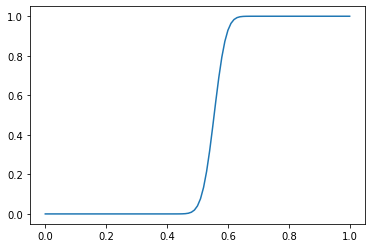

In [5]:
# pandas 시리즈에 있는 cumsum() 메서드를 통해 CDF를 표현 가능
posterior.cumsum().plot()

<AxesSubplot:>

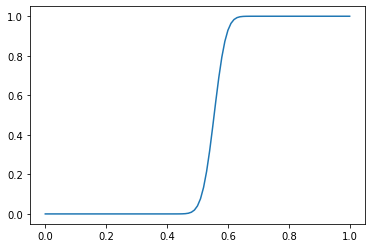

In [7]:
# 혹은 Pmf 객체의 make_cdf() 메서드 활용 가능
cumulative = posterior.make_cdf()
cumulative.plot()

In [10]:
# make_cdf로 만들어진 객체는 함수 형태 혹은 quantile 등의 메서드 활용 가능
cumulative(0.61), cumulative.quantile(0.96), cumulative.credible_interval(0.9)

(array(0.96383032), array(0.61), array([0.51, 0.61]))

In [12]:
pmf = cumulative.make_pmf()
np.allclose(pmf, posterior)

True

<AxesSubplot:>

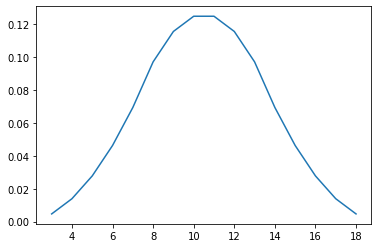

In [13]:
dice = make_dice(6)
pmf_3d6 = add_dist_seq([dice] * 3)
pmf_3d6.plot()

(<AxesSubplot:>, (16,))

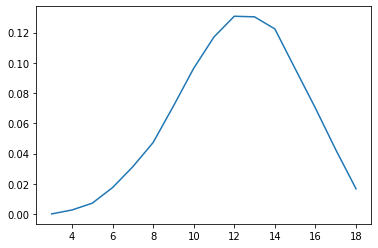

In [15]:
n = 10000
imsi = np.random.randint(1, 7, size=(n, 4))
imsi.sort(axis=1)
t = imsi[:, 1:].sum(axis=1)
pmf_best3 = Pmf.from_seq(t)
pmf_best3.plot(), pmf_best3.shape

,probs
3,1.000000e-24
4,4.818903e-16
5,9.995181e-13
6,4.315100e-10
7,4.089735e-08


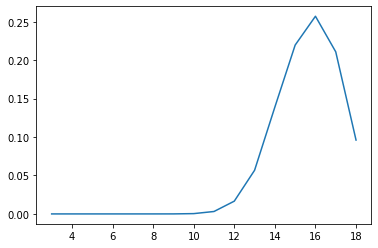

In [20]:
pmf_best3.max_dist(6).plot()
pmf_best3.max_dist(6).head(5)

,probs
3,0.000600
4,0.016083
5,0.041837
6,0.095544
7,0.150766


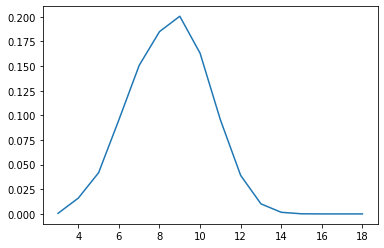

In [21]:
pmf_best3.min_dist(6).plot()
pmf_best3.min_dist(6).head(5)

<AxesSubplot:>

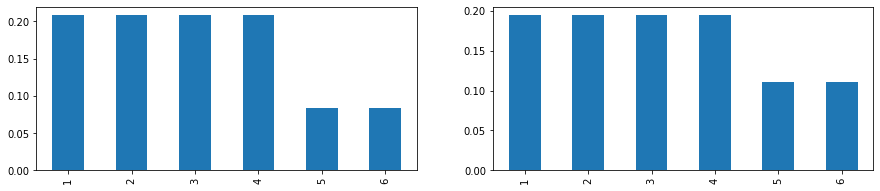

In [22]:
d4 = make_dice(4)
d6 = make_dice(6)
# add_dist()와 헷갈리지 않도록 주의 → + 연산자는 그냥 확률을 더하는 것
mix1 = (d4 + d6) / 2
mix2 = (d4 + 2 * d6) / 3
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
mix1.plot.bar(ax=ax1)
mix2.plot.bar(ax=ax2)

In [23]:
hypos = np.array([4, 6, 8])
counts = np.array([1, 2, 3])
pmf_dice = Pmf(counts, hypos)
pmf_dice.normalize()
pmf_dice

,probs
4,0.166667
6,0.333333
8,0.500000


In [25]:
dice = [make_dice(sides) for sides in hypos]
df = pd.DataFrame(dice).fillna(0).T
df

,,,
1,0.25,0.166667,0.125
2,0.25,0.166667,0.125
3,0.25,0.166667,0.125
4,0.25,0.166667,0.125
5,0.00,0.166667,0.125
6,0.00,0.166667,0.125
7,0.00,0.000000,0.125
8,0.00,0.000000,0.125


In [30]:
df * pmf_dice.ps

,,,
1,0.041667,0.055556,0.0625
2,0.041667,0.055556,0.0625
3,0.041667,0.055556,0.0625
4,0.041667,0.055556,0.0625
5,0.000000,0.055556,0.0625
6,0.000000,0.055556,0.0625
7,0.000000,0.000000,0.0625
8,0.000000,0.000000,0.0625


<AxesSubplot:>

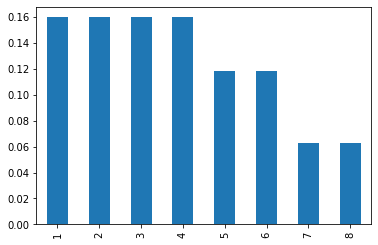

In [31]:
mix = make_mixture(pmf_dice, dice)
mix.plot.bar()